In [4]:
#coding=utf-8
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import datetime


%matplotlib inline
data=pd.read_csv('/Users/rickie/Desktop/金融信贷风控的机器学习实战课件（评分卡）/第二课：代码和数据/application.csv',encoding='ISO-8859-1')

data.desc.unique()

array([ '  Borrower added on 12/22/11 > I need to upgrade my business technologies.<br>',
       '  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike. I only need this money because the deal im looking at is to good to pass up.<br><br>  Borrower added on 12/22/11 > I plan to use this money to finance the motorcycle i am looking at. I plan to have it paid off as soon as possible/when i sell my old bike.I only need this money because the deal im looking at is to good to pass up. I have finished college with an associates degree in business and its takingmeplaces<br>',
       nan, ...,
       'Our current gutter system on our home is old and in need of repair.    We will be using the borrowed funds to replace the gutter system on our home.',
       'The rate of interest and fees incurred by carrying a balance on my credit card are so outrageous at this point that continuin

# Data Cleaning

In [6]:
data['term_new']=data['term'].apply(lambda x: int(x.replace('months','')))
data['y']=data['loan_status'].apply(lambda x: int(x=='Charged Off'))
data1=data[data.term_new==36]
data1
train,test=train_test_split(data1,test_size=0.4)


In [7]:
import re
pd.options.display.max_rows=10
train['int_rate_cl']=train['int_rate'].map(lambda x: float(x.replace('%',''))/100)

def CareerYear(x):
    if x.find('n/a')>-1:
        return -1
    elif x.find('10+')>-1:
        return 11
    elif x.find('<1')>-1:
        return 0
    else:
        return int(re.sub('\D',"",x))#所有非数字字符改为空
train['emp_length_cl']=train['emp_length'].map(CareerYear)


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [8]:
def DescExist(x):
    x1=str(x)
    if x1=='nan':
        return 'no desc'
    else:
        return 'desc'
train['desc_cl']=train.desc.map(DescExist)
train

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


,member_id,loan_amnt,term,loan_status,int_rate,emp_length,home_ownership,annual_inc,verification_status,desc,...,pub_rec,total_acc,pub_rec_bankruptcies,issue_d,earliest_cr_line,term_new,y,int_rate_cl,emp_length_cl,desc_cl
35335,35336,4800,36 months,Fully Paid,8.59%,10+ years,MORTGAGE,52000.00,Not Verified,I'm putting in a new driveway at my home.,...,0,20,0.0,Sep-09,Apr-95,36,0,0.0859,11,desc
9245,9246,10000,36 months,Fully Paid,10.99%,3 years,MORTGAGE,123000.00,Not Verified,Borrower added on 08/15/11 > This loan will ...,...,0,22,0.0,Aug-11,Jul-88,36,0,0.1099,3,desc
32769,32770,15000,36 months,Fully Paid,9.88%,10+ years,MORTGAGE,40000.00,Not Verified,Borrower added on 01/22/10 > pay off credit ...,...,0,50,0.0,Jan-10,May-90,36,0,0.0988,11,desc
18149,18150,25000,36 months,Fully Paid,18.62%,4 years,MORTGAGE,71007.00,Verified,Borrower added on 03/17/11 > The time has co...,...,0,31,0.0,Mar-11,May-94,36,0,0.1862,4,desc
14521,14522,3000,36 months,Fully Paid,10.99%,2 years,RENT,31200.00,Not Verified,NaN,...,0,12,0.0,May-11,Feb-08,36,0,0.1099,2,no desc
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17363,17364,10000,36 months,Fully Paid,10.74%,3 years,RENT,47508.00,Not Verified,"Borrower added on 04/01/11 > Hello, <br/><br...",...,0,12,0.0,Apr-11,Nov-03,36,0,0.1074,3,desc
1597,1598,9000,36 months,Fully Paid,16.29%,n/a,MORTGAGE,33098.88,Not Verified,NaN,...,0,14,0.0,Dec-11,Jan-90,36,0,0.1629,-1,no desc
28442,28443,10000,36 months,Fully Paid,13.61%,10+ years,MORTGAGE,59650.00,Verified,NaN,...,1,21,1.0,Jul-10,Oct-95,36,0,0.1361,11,no desc
37891,37892,10000,36 months,Fully Paid,15.05%,2 years,RENT,40000.00,Verified,I consolidated my credit cards to Bank of Amer...,...,0,28,0.0,Jan-09,Sep-00,36,0,0.1505,2,desc


In [9]:
import time
def ConvertDateStr(x,format):
    if str(x)=='nan':
        return datetime.datetime.fromtimestamp(time.mktime(time.strptime('9900-1','%Y-%m')))
    else:
        return datetime.datetime.fromtimestamp(time.mktime(time.strptime(x,format)))
train['issue_d_cl']=train.issue_d.map(lambda x: ConvertDateStr(x,'%b-%y'))
train['ear_cr_line_cl']=train.earliest_cr_line.map(lambda x: ConvertDateStr(x,'%b-%y'))
train.ear_cr_line_cl
       

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


35335   1995-04-01
9245    1988-07-01
32769   1990-05-01
18149   1994-05-01
14521   2008-02-01
           ...    
17363   2003-11-01
1597    1990-01-01
28442   1995-10-01
37891   2000-09-01
36226   2004-10-01
Name: ear_cr_line_cl, Length: 17457, dtype: datetime64[ns]

In [10]:
import numpy as np
def MakeupMissing(x):
    if np.isnan(x):
        return -1
    else:
        return x
train['mths_since_last_delinq_cl']=train['mths_since_last_delinq'].map(lambda x: MakeupMissing(x))
train['mths_since_last_record_cl'] = train['mths_since_last_record'].map(lambda x:MakeupMissing(x))
train['pub_rec_bankruptcies_cl'] = train['pub_rec_bankruptcies'].map(lambda x:MakeupMissing(x))
train.count()


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org

member_id                    17457
loan_amnt                    17457
term                         17457
loan_status                  17457
int_rate                     17457
                             ...  
issue_d_cl                   17457
ear_cr_line_cl               17457
mths_since_last_delinq_cl    17457
mths_since_last_record_cl    17457
pub_rec_bankruptcies_cl      17457
Length: 35, dtype: int64

0

## 特征衍生

In [17]:
train['amt_to_inc']=train.apply(lambda x:x.loan_amnt/x.annual_inc,axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17457 entries, 35335 to 36226
Data columns (total 36 columns):
member_id                    17457 non-null int64
loan_amnt                    17457 non-null int64
term                         17457 non-null object
loan_status                  17457 non-null object
int_rate                     17457 non-null object
emp_length                   17457 non-null object
home_ownership               17457 non-null object
annual_inc                   17457 non-null float64
verification_status          17457 non-null object
desc                         11872 non-null object
purpose                      17457 non-null object
title                        17454 non-null object
zip_code                     17457 non-null object
addr_state                   17457 non-null object
dti                          17457 non-null float64
delinq_2yrs                  17457 non-null int64
inq_last_6mths               17457 non-null int64
mths_since_last_delinq

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [18]:
from dateutil.relativedelta import relativedelta

def MonthGap(ear,late):
    if late>ear:
        gap=relativedelta(late,ear)
        yr=gap.years
        mth=gap.months
        return yr*12+mth
    else:
        return 0
    
train['earliest_cr_to_app']=train.apply(lambda x: MonthGap(x.ear_cr_line_cl,x.issue_d_cl),axis=1)
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17457 entries, 35335 to 36226
Data columns (total 37 columns):
member_id                    17457 non-null int64
loan_amnt                    17457 non-null int64
term                         17457 non-null object
loan_status                  17457 non-null object
int_rate                     17457 non-null object
emp_length                   17457 non-null object
home_ownership               17457 non-null object
annual_inc                   17457 non-null float64
verification_status          17457 non-null object
desc                         11872 non-null object
purpose                      17457 non-null object
title                        17454 non-null object
zip_code                     17457 non-null object
addr_state                   17457 non-null object
dti                          17457 non-null float64
delinq_2yrs                  17457 non-null int64
inq_last_6mths               17457 non-null int64
mths_since_last_delinq

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


# Explortory Data Analysis

,MORTGAGE,OWN,RENT,OTHER,NONE
loan_status,,,,,
Charged Off,13.818269,13.698767,13.879058,13.185556,NaN
Fully Paid,11.469996,11.444799,12.018963,11.783375,8.696667


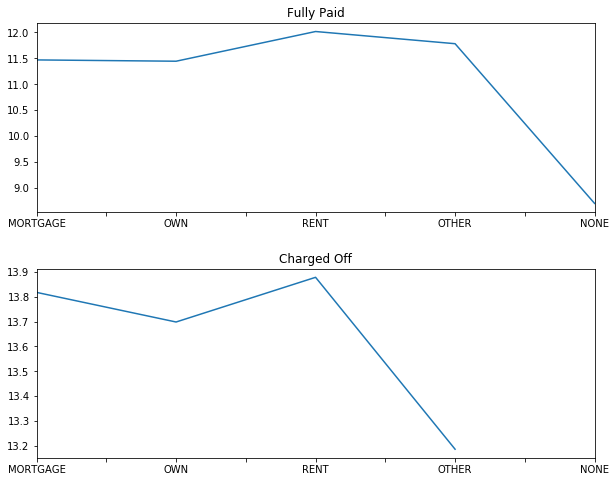

In [109]:
data['int_rate_float']=data.int_rate.str.strip('%').astype(float)
table1=data.groupby(['loan_status','home_ownership']).int_rate_float.mean().unstack()
table1=pd.DataFrame(table1,columns=['MORTGAGE','OWN','RENT','OTHER','NONE'])
fig,axes=plt.subplots(2,1,figsize=(10,8))
table1.loc['Fully Paid',].plot(title='Fully Paid',ax=axes[0])
table1.loc['Charged Off',].plot(title='Charged Off',ax=axes[1])
plt.subplots_adjust(hspace=0.3)
table1

member_id               39785
loan_amnt               39785
term                    39785
loan_status             39785
int_rate                39785
                        ...  
pub_rec_bankruptcies    39088
issue_d                 39785
earliest_cr_line        39785
term_new                39785
y                       39785
Length: 27, dtype: int64

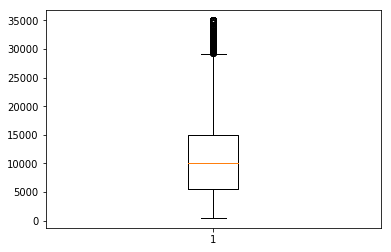

In [19]:
plt.boxplot(data.loan_amnt)
data.count()

### 日期处理

In [27]:
from dateutil.parser import parse
d_=list(data.issue_d)
date_list=[]
for date in d_:
    date=parse(date)
    date=date.strftime('%Y-%m-%d')
    date_list.append(date)
date_series=pd.Series(date_list)

data['issue_d_ymd']=date_list
data['issue_d_ymd']

0        2018-12-11
1        2018-12-11
2        2018-12-11
3        2018-12-11
4        2018-12-11
            ...    
39780    2018-07-07
39781    2018-07-07
39782    2018-07-07
39783    2018-07-07
39784    2018-06-07
Name: issue_d_ymd, Length: 39785, dtype: object

NameError: name 'count_owner' is not defined

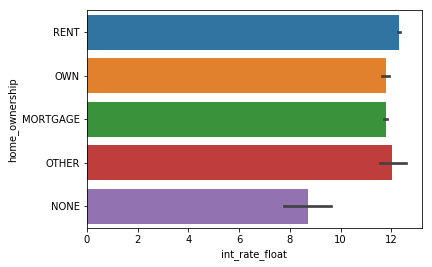

In [28]:
data['int_rate_float']=data.int_rate.str.strip('%').astype(float)
data.groupby('home_ownership').int_rate_float.mean().sort_values(ascending=False)
sns.barplot(x='int_rate_float',y='home_ownership',data=data)


In [ ]:

count_owner=data.groupby('home_ownership').size().sort_values(ascending=False)
fig,ax=plt.subplots(2,1,figsize=(10,8))
count_owner.plot(kind='bar',ax=ax[0])
sns.countplot(data.home_ownership,ax=ax[1])
ax[0].set_xticklabels(labels=count_owner.index,rotation=30)
plt.subplots_adjust(hspace=0.5)

In [ ]:
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax2=fig.add_subplot(1,2,2)

ax1.hist(data.loan_amnt)
ax2.boxplot(data.annual_inc)
plt.subplots_adjust(wspace=0.6)
plt.show()



In [ ]:
plt.scatter(x=data.annual_inc,y=data.loan_amnt)

# 特征分箱

In [31]:
cat_features = ['home_ownership', 'verification_status','desc_cl', 'purpose', 'zip_code','addr_state','pub_rec_bankruptcies_cl']
num_features=['int_rate_cl','emp_length_cl','annual_inc', 'dti', 'delinq_2yrs', 'earliest_cr_to_app','inq_last_6mths', \
                'mths_since_last_record_cl', 'mths_since_last_delinq_cl','open_acc','pub_rec','total_acc']

more_value_features = []
less_value_features = []


for var in cat_features:
    ValCounts=len(set(train[var]))
    print(ValCounts)
    if ValCounts>5:
        more_value_features.append(var)
    else:
        less_value_features.append(var)

less_value_features
BinBadRate(train,'home_ownership', 'y')

5
3
2
14
783
50
4


({'MORTGAGE': 0.098484848484848481,
  'NONE': 0.0,
  'OTHER': 0.20000000000000001,
  'OWN': 0.10432931156848829,
  'RENT': 0.12287035992327654},
   home_ownership  total   bad  bad_rate
 0       MORTGAGE   7128   702  0.098485
 1           NONE      2     0  0.000000
 2          OTHER     55    11  0.200000
 3            OWN   1409   147  0.104329
 4           RENT   8863  1089  0.122870)

In [34]:

var_bin_list = []
for col in less_value_features:
    binBadRate = BinBadRate(train, col, 'y')[0]
    if min(binBadRate.values()) == 0:
        print('{} need to be combined due to 0 bad rate'.format(col))
        combine_bin = MergeBad0(train, col, 'y')
        
        newVar = col + '_Bin'
        train[newVar] = train[col].map(lambda x:combine_bin[x])
        var_bin_list.append(newVar)
    if min(binBadRate.values()) == 1:
        print('{} need to be combined due to 0 good rate'.format(col))
        combine_bin = MergeBad0(train, col, 'y')
        
        newVar = col + '_Bin'
        train[newVar] = train[col].map(lambda x:combine_bin[x])
        var_bin_list.append(newVar)
        print(merge_bin)
less_value_features = [i for i in less_value_features if i + '_Bin' not in var_bin_list]
var_bin_list


home_ownership need to be combined due to 0 bad rate
  home_ownership  total   bad  bad_rate
1           NONE      2     0  0.000000
0       MORTGAGE   7128   702  0.098485
3            OWN   1409   147  0.104329
4           RENT   8863  1089  0.122870
2          OTHER     55    11  0.200000


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


['home_ownership_Bin']

In [30]:
def BinBadRate(df,col,target,grantRateIndicator=0):
    total=df.groupby([col])[target].count()
    total=pd.DataFrame({'total':total})
    bad=df.groupby([col])[target].sum()
    bad=pd.DataFrame({'bad':bad})
    group=total.merge(bad,left_index=True,right_index=True,how='left')
    group.reset_index(level=0,inplace=True)
    group['bad_rate']=group.apply(lambda x:x.bad/x.total,axis=1)
    dicts=dict(zip(group[col],group['bad_rate']))
    if grantRateIndicator==0:
        return (dicts, group)
    N = sum(group['total'])
    B = sum(group['bad'])
    overallRate = B * 1.0 / N
    return (dicts, group, overallRate)
BinBadRate(train, 'home_ownership', 'y')

({'MORTGAGE': 0.098484848484848481,
  'NONE': 0.0,
  'OTHER': 0.20000000000000001,
  'OWN': 0.10432931156848829,
  'RENT': 0.12287035992327654},
   home_ownership  total   bad  bad_rate
 0       MORTGAGE   7128   702  0.098485
 1           NONE      2     0  0.000000
 2          OTHER     55    11  0.200000
 3            OWN   1409   147  0.104329
 4           RENT   8863  1089  0.122870)

In [33]:
def MergeBad0(df,col,target):    
    regroup = BinBadRate(df, col, target)[1]
    regroup = regroup.sort_values(by  = 'bad_rate')
    print(regroup)
    col_regroup = [[i] for i in regroup[col]]
    for i in range(regroup.shape[0]-1):
        if regroup['bad_rate'][i+1] > 0:
            break
        col_regroup[i+1] = col_regroup[i] + col_regroup[i+1]
        col_regroup.pop(i)
    
        
            
    newGroup = {}
    for i in range(len(col_regroup)):
        for g2 in col_regroup[i]:
            newGroup[g2] = 'Bin '+str(i)
            
    return newGroup
MergeBad0(train, 'home_ownership', 'y')

  home_ownership  total   bad  bad_rate
1           NONE      2     0  0.000000
0       MORTGAGE   7128   702  0.098485
3            OWN   1409   147  0.104329
4           RENT   8863  1089  0.122870
2          OTHER     55    11  0.200000


{'MORTGAGE': 'Bin 0',
 'NONE': 'Bin 0',
 'OTHER': 'Bin 3',
 'OWN': 'Bin 1',
 'RENT': 'Bin 2'}

In [35]:
def BadRateEncoding(df,col,target):
    
    regroup=BinBadRate(df,col,target)[1]
    br_dict=regroup[[col,'bad_rate']].set_index([col]).to_dict(orient='index')
    for k,v in br_dict.items():
        br_dict[k]=v['bad_rate']
    BadRateEncoding=df[col].map(lambda x:br_dict[x])
    return {'encoding':BadRateEncoding, 'bad_rate':br_dict}

BadRateEncoding(train,'purpose','y')



{'bad_rate': {'car': 0.095070422535211266,
  'credit_card': 0.081237113402061856,
  'debt_consolidation': 0.11007907618928078,
  'educational': 0.18716577540106952,
  'home_improvement': 0.099332220367278803,
  'house': 0.14634146341463414,
  'major_purchase': 0.077519379844961239,
  'medical': 0.12861736334405144,
  'moving': 0.17465753424657535,
  'other': 0.1341138903672166,
  'renewable_energy': 0.22916666666666666,
  'small_business': 0.21017402945113789,
  'vacation': 0.10731707317073171,
  'wedding': 0.069124423963133647},
 'encoding': 35335    0.134114
 9245     0.110079
 32769    0.110079
 18149    0.081237
 14521    0.110079
            ...   
 17363    0.110079
 1597     0.081237
 28442    0.110079
 37891    0.081237
 36226    0.095070
 Name: purpose, Length: 17457, dtype: float64}

In [36]:
br_encoding_dict={}
for col in more_value_features:
    br_encoding=BadRateEncoding(train,col,'y')
    train[col+'_br_encoding']=br_encoding['encoding']
    br_encoding_dict[col]=br_encoding['bad_rate']
    num_features.append(col+'_br_encoding')
train

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


,member_id,loan_amnt,term,loan_status,int_rate,emp_length,home_ownership,annual_inc,verification_status,desc,...,ear_cr_line_cl,mths_since_last_delinq_cl,mths_since_last_record_cl,pub_rec_bankruptcies_cl,amt_to_inc,earliest_cr_to_app,home_ownership_Bin,purpose_br_encoding,zip_code_br_encoding,addr_state_br_encoding
35335,35336,4800,36 months,Fully Paid,8.59%,10+ years,MORTGAGE,52000.00,Not Verified,I'm putting in a new driveway at my home.,...,1995-04-01,78.0,-1.0,0.0,0.092308,173,Bin 0,0.134114,0.166667,0.102713
9245,9246,10000,36 months,Fully Paid,10.99%,3 years,MORTGAGE,123000.00,Not Verified,Borrower added on 08/15/11 > This loan will ...,...,1988-07-01,-1.0,-1.0,0.0,0.081301,277,Bin 0,0.110079,0.066667,0.115974
32769,32770,15000,36 months,Fully Paid,9.88%,10+ years,MORTGAGE,40000.00,Not Verified,Borrower added on 01/22/10 > pay off credit ...,...,1990-05-01,-1.0,-1.0,0.0,0.375000,236,Bin 0,0.110079,0.111111,0.131546
18149,18150,25000,36 months,Fully Paid,18.62%,4 years,MORTGAGE,71007.00,Verified,Borrower added on 03/17/11 > The time has co...,...,1994-05-01,-1.0,-1.0,0.0,0.352078,202,Bin 0,0.081237,0.075000,0.064286
14521,14522,3000,36 months,Fully Paid,10.99%,2 years,RENT,31200.00,Not Verified,NaN,...,2008-02-01,-1.0,-1.0,0.0,0.096154,39,Bin 2,0.110079,0.064516,0.118644
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17363,17364,10000,36 months,Fully Paid,10.74%,3 years,RENT,47508.00,Not Verified,"Borrower added on 04/01/11 > Hello, <br/><br...",...,2003-11-01,-1.0,-1.0,0.0,0.210491,89,Bin 2,0.110079,0.117647,0.096525
1597,1598,9000,36 months,Fully Paid,16.29%,n/a,MORTGAGE,33098.88,Not Verified,NaN,...,1990-01-01,45.0,-1.0,0.0,0.271913,263,Bin 0,0.081237,0.000000,0.096525
28442,28443,10000,36 months,Fully Paid,13.61%,10+ years,MORTGAGE,59650.00,Verified,NaN,...,1995-10-01,41.0,109.0,1.0,0.167645,177,Bin 0,0.110079,0.346154,0.125945
37891,37892,10000,36 months,Fully Paid,15.05%,2 years,RENT,40000.00,Verified,I consolidated my credit cards to Bank of Amer...,...,2000-09-01,42.0,-1.0,0.0,0.250000,100,Bin 2,0.081237,0.104762,0.131546


In [37]:
def SplitData(df,col,numberOfSplits):
    df2=df.copy()
    N=df2.shape[0]
    n=N//numberOfSplits
    SplitPointIndex=[i*n for i in range(1,numberOfSplits)]
    rawValues=sorted(df[col])
    SplitPoint=[rawValues[i] for i in SplitPointIndex]
    SplitPoint=sorted(set(SplitPoint))
    return SplitPoint
#SplitData(train,'annual_inc',100)
def AssignGroup(x,bin):
    N=len(bin)
    if x<=min(bin):
        return min(bin)
    elif x>max(bin):
        return 10e10
    else:
        for i in range(N-1):
            if bin[i]<x<=bin[i+1]:
                return bin[i+1]
            

In [38]:
def AssignGroup(x, bin):
    N = len(bin)
    if x<=min(bin):
        return min(bin)
    elif x>max(bin):
        return 10e10
    else:
        for i in range(N-1):
            if bin[i] < x <= bin[i+1]:
                return bin[i+1]


In [39]:
def Chi2(df,total_col,bad_col,overall_rate):
    df2=df.copy()
    df2['expected']=df2[total_col].apply(lambda x:x*overall_rate)
    combined=zip(df2['expected'],df2[bad_col])
    chi=[(i[0]-i[1])**2/i[0] for i in combined]
    chi2=sum(chi)
    return chi2

In [40]:
def AssignBin(x, cutOffPoints,special_attribute=[]):
    '''
    :param x: the value of variable
    :param cutOffPoints: the ChiMerge result for continous variable
    :param special_attribute:  the special attribute which should be assigned separately
    :return: bin number, indexing from 0
    for example, if cutOffPoints = [10,20,30], if x = 7, return Bin 0. If x = 35, return Bin 3
    '''
    numBin = len(cutOffPoints) + 1 + len(special_attribute)
    if x in special_attribute:
        i = special_attribute.index(x)+1
        return 'Bin {}'.format(0-i)
    if x<=cutOffPoints[0]:
        return 'Bin 0'
    elif x > cutOffPoints[-1]:
        return 'Bin {}'.format(numBin-1)
    else:
        for i in range(0,numBin-1):
            if cutOffPoints[i] < x <=  cutOffPoints[i+1]:
                return 'Bin {}'.format(i+1)

In [ ]:
#

In [41]:
def ChiMerge(df, col, target, max_interval=5,special_attribute=[],minBinPcnt=0):
    '''
    :param df: 包含目标变量与分箱属性的数据框
    :param col: 需要分箱的属性
    :param target: 目标变量，取值0或1
    :param max_interval: 最大分箱数。如果原始属性的取值个数低于该参数，不执行这段函数
    :param special_attribute: 不参与分箱的属性取值
    :param minBinPcnt：最小箱的占比，默认为0
    :return: 分箱结果
    '''
    colLevels = sorted(set(df[col]))
    N_distinct = len(colLevels)
    if N_distinct <= max_interval:  #如果原始属性的取值个数低于max_interval，不执行这段函数
        print("The number of original levels for {} is less than or equal to max intervals".format(col))
        return colLevels[:-1]
    else:
        if len(special_attribute)>=1:
            df1 = df.loc[df[col].isin(special_attribute)]
            df2 = df.loc[~df[col].isin(special_attribute)]
        else:
            df2 = df.copy()
        N_distinct = len(set(df2[col]))

        # 步骤一: 通过col对数据集进行分组，求出每组的总样本数与坏样本数
        if N_distinct > 100:
            split_x = SplitData(df2, col, 100)# 返回split_point
            df2['temp'] = df2[col].map(lambda x: AssignGroup(x, split_x))# 给不同数值分配不同的split_point
        else:
            df2['temp'] = df[col]
        # 总体bad rate将被用来计算expected bad count
        (binBadRate, regroup, overallRate) = BinBadRate(df2, 'temp', target, grantRateIndicator=1)

        # 首先，每个单独的属性值将被分为单独的一组
        # 对属性值进行排序，然后两两组别进行合并
        colLevels = sorted(set(df2['temp']))#排序
        groupIntervals = [[i] for i in colLevels]

        # 步骤二：建立循环，不断合并最优的相邻两个组别，直到：
        # 1，最终分裂出来的分箱数<＝预设的最大分箱数
        # 2，每箱的占比不低于预设值（可选）
        # 3，每箱同时包含好坏样本
        # 如果有特殊属性，那么最终分裂出来的分箱数＝预设的最大分箱数－特殊属性的个数
        split_intervals = max_interval - len(special_attribute)
        while (len(groupIntervals) > split_intervals):  # 终止条件: 当前分箱数＝预设的分箱数
            # 每次循环时, 计算合并相邻组别后的卡方值。具有最小卡方值的合并方案，是最优方案
            chisqList = []
            for k in range(len(groupIntervals)-1):
                temp_group = groupIntervals[k] + groupIntervals[k+1]
                df2b = regroup.loc[regroup['temp'].isin(temp_group)]
                chisq = Chi2(df2b, 'total', 'bad', overallRate)
                chisqList.append(chisq)
            best_comnbined = chisqList.index(min(chisqList))
            groupIntervals[best_comnbined] = groupIntervals[best_comnbined] + groupIntervals[best_comnbined+1]
            # after combining two intervals, we need to remove (next) one of them
            groupIntervals.remove(groupIntervals[best_comnbined+1])
        groupIntervals = [sorted(i) for i in groupIntervals]#针对合并后一箱有两个值的情况，数值排列
        cutOffPoints = [max(i) for i in groupIntervals[:-1]]

        # 检查是否有箱没有好或者坏样本。如果有，需要跟相邻的箱进行合并，直到每箱同时包含好坏样本
        groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))# 每个assign了bin,并编号
        df2['temp_Bin'] = groupedvalues
        (binBadRate,regroup) = BinBadRate(df2, 'temp_Bin', target)
        [minBadRate, maxBadRate] = [min(binBadRate.values()),max(binBadRate.values())]
        while minBadRate ==0 or maxBadRate == 1:
            # 找出全部为好／坏样本的箱
            indexForBad01 = regroup[regroup['bad_rate'].isin([0,1])].temp_Bin.tolist()
            bin=indexForBad01[0]# ???已排序
            # 如果是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
            if bin == max(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[:-1]
            # 如果是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
            elif bin == min(regroup.temp_Bin):
                cutOffPoints = cutOffPoints[1:]
            # 如果是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
            else:
                # 和前一箱进行合并，并且计算卡方值
                currentIndex = list(regroup.temp_Bin).index(bin)#目的是找到bin的index，为group后的list
                prevIndex = list(regroup.temp_Bin)[currentIndex - 1]
                df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                chisq1 = Chi2(df2b, 'total', 'bad', overallRate)
                # 和后一箱进行合并，并且计算卡方值
                laterIndex = list(regroup.temp_Bin)[currentIndex + 1]
                df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, bin])]
                (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                chisq2 = Chi2(df2b, 'total', 'bad', overallRate)
                if chisq1 < chisq2:
                    cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                else:
                    cutOffPoints.remove(cutOffPoints[currentIndex])
            # 完成合并之后，需要再次计算新的分箱准则下，每箱是否同时包含好坏样本
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            (binBadRate, regroup) = BinBadRate(df2, 'temp_Bin', target)
            [minBadRate, maxBadRate] = [min(binBadRate.values()), max(binBadRate.values())]
        # 需要检查分箱后的最小占比
        if minBinPcnt > 0:
            groupedvalues = df2['temp'].apply(lambda x: AssignBin(x, cutOffPoints))
            df2['temp_Bin'] = groupedvalues
            valueCounts = groupedvalues.value_counts().to_frame()
            valueCounts['pcnt'] = valueCounts['temp'].apply(lambda x: x * 1.0 / N)
            valueCounts = valueCounts.sort_index()
            minPcnt = min(valueCounts['pcnt'])
            while minPcnt < 0.05 and len(cutOffPoints) > 2:
                # 找出占比最小的箱
                indexForMinPcnt = valueCounts[valueCounts['pcnt'] == minPcnt].index.tolist()[0]
                # 如果占比最小的箱是最后一箱，则需要和上一个箱进行合并，也就意味着分裂点cutOffPoints中的最后一个需要移除
                if indexForMinPcnt == max(valueCounts.index):
                    cutOffPoints = cutOffPoints[:-1]
                # 如果占比最小的箱是第一箱，则需要和下一个箱进行合并，也就意味着分裂点cutOffPoints中的第一个需要移除
                elif indexForMinPcnt == min(valueCounts.index):
                    cutOffPoints = cutOffPoints[1:]
                # 如果占比最小的箱是中间的某一箱，则需要和前后中的一个箱进行合并，依据是较小的卡方值
                else:
                    # 和前一箱进行合并，并且计算卡方值
                    currentIndex = list(valueCounts.index).index(indexForMinPcnt)
                    prevIndex = list(valueCounts.index)[currentIndex - 1]
                    df3 = df2.loc[df2['temp_Bin'].isin([prevIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3, 'temp_Bin', target)
                    chisq1 = Chi2(df2b, 'total', 'bad', overallRate)
                    # 和后一箱进行合并，并且计算卡方值
                    laterIndex = list(valueCounts.index)[currentIndex + 1]
                    df3b = df2.loc[df2['temp_Bin'].isin([laterIndex, indexForMinPcnt])]
                    (binBadRate, df2b) = BinBadRate(df3b, 'temp_Bin', target)
                    chisq2 = Chi2(df2b, 'total', 'bad', overallRate)
                    if chisq1 < chisq2:
                        cutOffPoints.remove(cutOffPoints[currentIndex - 1])
                    else:
                        cutOffPoints.remove(cutOffPoints[currentIndex])
        cutOffPoints = special_attribute + cutOffPoints
        return cutOffPoints

In [42]:
def BadRateMonotone(df,sortByVar,target,special_attribute=[]):
    df2=df.loc[~df[sortByVar].isin(special_attribute)]
    if len(set(df2[sortByVar]))<=2:
        return True
    regroup=BinBadRate(df2,sortByVar,target)[1]
    combined=zip(regroup['total'],regroup['bad'])
    badRate=[i[1]/i[0] for i in combined]
    BadRateMonotone= [badRate[i]<badRate[i+1] and badRate[i]>badRate[i-1] or badRate[i]>badRate[i+1] and badRate[i]<badRate[i-1] 
                      for i in range(1,len(badRate)-1)]
    Monotone=len(set(BadRateMonotone))
    if Monotone==1:
        return True
    else:
        return False
        
num_features

['int_rate_cl',
 'emp_length_cl',
 'annual_inc',
 'dti',
 'delinq_2yrs',
 'earliest_cr_to_app',
 'inq_last_6mths',
 'mths_since_last_record_cl',
 'mths_since_last_delinq_cl',
 'open_acc',
 'pub_rec',
 'total_acc',
 'purpose_br_encoding',
 'zip_code_br_encoding',
 'addr_state_br_encoding']

In [43]:
continous_merged_dict = {}
for col in num_features:
    print("{} is in processing".format(col))
    max_interval=5
    if -1 not in set(train[col]):
        cutOff=ChiMerge(train,col,'y',max_interval=max_interval,special_attribute=[],minBinPcnt=0)
        train[col+'_Bin']=train[col].apply(lambda x:AssignBin(x,cutOff,special_attribute=[]))
        monotone=BadRateMonotone(train,col+'_Bin','y')
        while (not monotone):
            max_interval -=1
            cutOff=ChiMerge(train,col,'y',max_interval=max_interval,special_attribute=[],minBinPcnt=0)
            train[col+'_Bin']=train[col].apply(lambda x:AssignBin(x,cutOff,special_attribute=[]))
            if max_interval==2:
                break
            monotone=BadRateMonotone(train,col+'_Bin','y')
        newVar = col + '_Bin'
        train[newVar] = train[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        var_bin_list.append(newVar)
    else:
        cutOff=ChiMerge(train,col,'y',max_interval=max_interval,special_attribute=[-1],minBinPcnt=0)
        train[col+'_Bin']=train[col].apply(lambda x:AssignBin(x,cutOff,special_attribute=[-1]))
        monotone=BadRateMonotone(train,col+'_Bin','y')
        while (not monotone):
            max_interval -=1
            cutOff=ChiMerge(train,col,'y',max_interval=max_interval,special_attribute=[-1],minBinPcnt=0)
            train[col+'_Bin']=train[col].apply(lambda x:AssignBin(x,cutOff,special_attribute=[-1]))
            if max_interval==2:
                break
            monotone=BadRateMonotone(train,col+'_Bin','y')
        newVar = col + '_Bin'
        train[newVar] = train[col].map(lambda x: AssignBin(x, cutOff, special_attribute=[]))
        var_bin_list.append(newVar)
    continous_merged_dict[col] = cutOff

int_rate_cl is in processing


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/

emp_length_cl is in processing


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/

annual_inc is in processing
dti is in processing


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':


delinq_2yrs is in processing
earliest_cr_to_app is in processing
inq_last_6mths is in processing
mths_since_last_record_cl is in processing
mths_since_last_delinq_cl is in processing
open_acc is in processing
pub_rec is in processing
The number of original levels for pub_rec is less than or equal to max intervals
total_acc is in processing
purpose_br_encoding is in processing
zip_code_br_encoding is in processing
addr_state_br_encoding is in processing


In [44]:
def CalcWOE(df,col,target):
    total=df.groupby(col)[target].count()
    total=pd.DataFrame({'total':total})
    bad=df.groupby(col)[target].sum()
    bad=pd.DataFrame({'bad':bad})
    regroup=total.merge(bad,left_index=True,right_index=True,how='left')
    regroup.reset_index(level=0,inplace=True)
    N=sum(regroup.total)
    B=sum(regroup.bad)
    regroup['good'] = regroup['total'] - regroup['bad']
    G = N - B
    regroup['bad_pcnt']=regroup.bad.apply(lambda x:x*1.0/B)
    regroup['good_pcnt']=regroup.good.apply(lambda x:x*1.0/G)
    regroup['WOE']=regroup.apply(lambda x: np.log(x.bad_pcnt*1.0/x.good_pcnt),axis=1)
    WOE_dict=regroup[[col,'WOE']].set_index(col).to_dict(orient='index')
    for k,v in WOE_dict.items():
        WOE_dict[k]=v['WOE']
    IV = regroup.apply(lambda x: (x.good_pcnt-x.bad_pcnt)*np.log(x.good_pcnt*1.0/x.bad_pcnt),axis = 1)
    IV = sum(IV)
    return {"WOE":WOE_dict,'IV':IV}


<Container object of 18 artists>

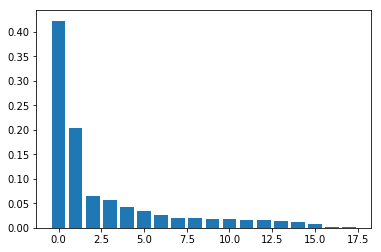

In [45]:
WOE_dict = {}
IV_dict = {}

all_var = var_bin_list  + less_value_features

for var in all_var[1:]:
    woe_iv=CalcWOE(train,var,'y')
    WOE_dict[var]=woe_iv['WOE']
    IV_dict[var]=woe_iv['IV']
IV_dict_sorted=sorted(IV_dict.items(),key=lambda x:x[1],reverse=True)
IV_values=[i[1] for i in IV_dict_sorted]
IV_keys=[i[0] for i in IV_dict_sorted]
plt.bar(range(len(IV_values)),IV_values)
    

## 多变量分析

In [46]:
high_IV={k:v for k,v in IV_dict.items() if v>=0.01}
high_IV_sorted=sorted(high_IV.items(),key=lambda x:x[1],reverse=True)

short_list=high_IV.keys()
short_list_2=[]
for var in short_list:
    newVar=var+'_WOE'
    train[newVar]=train[var].map(WOE_dict[var])
    short_list_2.append(newVar)
    

/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


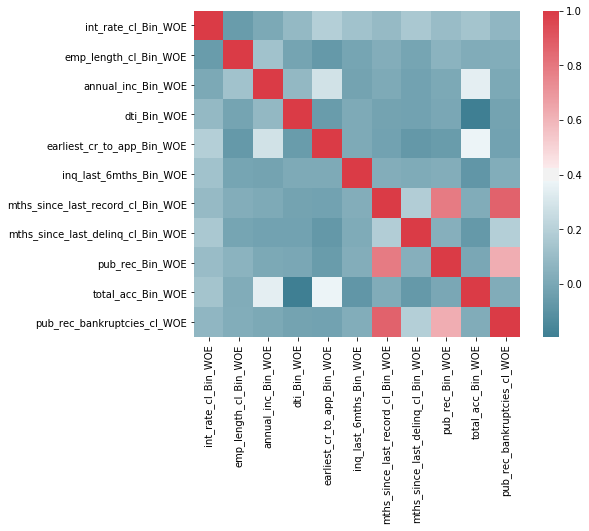

In [439]:
trainWOE=train[short_list_2]
f, ax = plt.subplots(figsize=(8, 6))
corr = trainWOE.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax)


In [47]:
deleted_index = []
cnt_vars = len(high_IV_sorted)
for i in range(cnt_vars):
    if i in deleted_index:
        continue
    x1=high_IV_sorted[i][0]+'_WOE'
    for j in range(cnt_vars):
        if i==j or j in deleted_index:
            continue
        y1=high_IV_sorted[j][0]+'_WOE'
        roh=np.corrcoef(train[x1],train[y1])[0,1]
        if abs(roh)>0.7:
            x1_IV = high_IV_sorted[i][1]
            y1_IV = high_IV_sorted[j][1]
            if x1_IV>y1_IV:
                deleted_index.append(j)
            else:
                deleted_index.append(i)

multi_analysis_vars_1=[high_IV_sorted[i][0]+"_WOE" for i in range(cnt_vars) if i not in deleted_index]
multi_analysis_vars_1


['zip_code_br_encoding_Bin_WOE',
 'int_rate_cl_Bin_WOE',
 'purpose_br_encoding_Bin_WOE',
 'annual_inc_Bin_WOE',
 'addr_state_br_encoding_Bin_WOE',
 'inq_last_6mths_Bin_WOE',
 'mths_since_last_record_cl_Bin_WOE',
 'open_acc_Bin_WOE',
 'total_acc_Bin_WOE',
 'earliest_cr_to_app_Bin_WOE',
 'emp_length_cl_Bin_WOE',
 'dti_Bin_WOE',
 'mths_since_last_delinq_cl_Bin_WOE']

In [48]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = np.matrix(train[multi_analysis_vars_1])
VIF_list=[variance_inflation_factor(X,i) for i in range(np.shape(X)[1])]
VIF_list
multi_analysis = multi_analysis_vars_1

In [49]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17457 entries, 35335 to 36226
Data columns (total 71 columns):
member_id                            17457 non-null int64
loan_amnt                            17457 non-null int64
term                                 17457 non-null object
loan_status                          17457 non-null object
int_rate                             17457 non-null object
emp_length                           17457 non-null object
home_ownership                       17457 non-null object
annual_inc                           17457 non-null float64
verification_status                  17457 non-null object
desc                                 11872 non-null object
purpose                              17457 non-null object
title                                17454 non-null object
zip_code                             17457 non-null object
addr_state                           17457 non-null object
dti                                  17457 non-null float64
de

## Logistic Regression

In [56]:
import statsmodels.api as sm
y=train['y']
X=train[multi_analysis]
X['intercept']=[1]*X.shape[0]
LR=sm.Logit(y,X).fit()
summary=LR.summary()
pvals=LR.pvalues
# pvals=pvals.to_dict()


Optimization terminated successfully.
         Current function value: 0.312409
         Iterations 7


/Users/rickie/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                17457
Model:                          Logit   Df Residuals:                    17443
Method:                           MLE   Df Model:                           13
Date:                Mon, 22 Oct 2018   Pseudo R-squ.:                  0.1073
Time:                        21:28:22   Log-Likelihood:                -5453.7
converged:                       True   LL-Null:                       -6108.9
                                        LLR p-value:                3.005e-272
=====================================================================================================
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
zip_code_br_encoding_Bin_WOE          0.9579      0.042     22.776      0.000       0.875       1.040
int_rate_cl_Bin_WOE                   0.9086      0.062     14.573      0.000       0.786       1.031
purpose_br_encoding_Bin_WOE           0.9182      0.098      9.349      0.000       0.726       1.111
annual_inc_Bin_WOE                    0.8574      0.116      7.416      0.000       0.631       1.084
addr_state_br_encoding_Bin_WOE        0.3898      0.123      3.175      0.001       0.149       0.630
inq_last_6mths_Bin_WOE                0.9303      0.129      7.218      0.000       0.678       1.183
mths_since_last_record_cl_Bin_WOE     0.6136      0.149      4.126      0.000       0.322       0.905
open_acc_Bin_WOE                      0.2048      0.196      1.047      0.295      -0.179       0.588
total_acc_Bin_WOE                     0.3954      0.200      1.973      0.048       0.003       0.788
earliest_cr_to_app_Bin_WOE           -0.0703      0.217     -0.324      0.746      -0.496       0.355
emp_length_cl_Bin_WOE                 0.9200      0.193      4.765      0.000       0.542       1.298
dti_Bin_WOE                           0.8523      0.218      3.910      0.000       0.425       1.279
mths_since_last_delinq_cl_Bin_WOE     0.3679      0.246      1.497      0.134      -0.114       0.850
intercept                            -2.0749      0.026    -78.614      0.000      -2.127      -2.023
=====================================================================================================
"""